# CSE688: Practical and Application of Machine Learning - Spring 2021
## Assignment 2-2
### Authors

- B073040018 朱劭璿
- B072010029 陳居廷

#### The attachment *normal.npy*, *outer_break.npy*, *inner_break.npy* store fifty samples of normal, outer-broken, inner-broken waveforms of bearing. Please design a neural network model to classify these three types of waveforms. Please inspect the waveform and watch for periodically waveforms. Consequently, please don't use the entire sample during both training and testing phase. Instead, get an useful segment and do the classification on it.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
DATA_DIR = '../data/'
inner_break = np.load(DATA_DIR+'inner_break.npy')
normal = np.load(DATA_DIR+'normal.npy')
outer_break = np.load(DATA_DIR+'outer_break.npy')

(1024,)

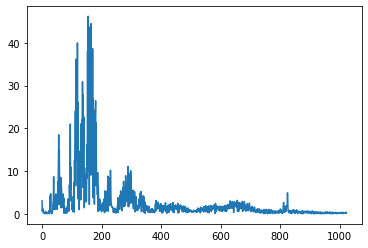

In [2]:
n = inner_break[8][4000:6046]
n = np.fft.rfft(n)
plt.plot(np.abs(n))
n.shape

In [3]:
X = np.concatenate([normal, inner_break, outer_break])[:, 4000:6046]
X = np.abs(np.fft.rfft(X))
Y = np.array([0]*55+[1]*55+[2]*55)
shuffler = np.random.permutation(len(X))
X = X[shuffler]
Y = Y[shuffler]
spliter = int(len(X)*0.7)
X_train, X_test = X[:spliter], X[spliter:]
Y_train, Y_test = Y[:spliter], Y[spliter:]

In [4]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer='l1', input_shape=(1024, )),
    tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer='l1'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(3)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8

In [5]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, name='loss'),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='acc')]
)
model.fit(
    X_train,
    Y_train,
    batch_size = 64,
    epochs = 10,
)

Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 560.7825 - acc: 0.3913
Epoch 2/10
2/2 [==============================] - 0s 2ms/step - loss: 524.7260 - acc: 0.5391
Epoch 3/10
2/2 [==============================] - 0s 2ms/step - loss: 489.2412 - acc: 0.7304
Epoch 4/10
2/2 [==============================] - 0s 2ms/step - loss: 455.1512 - acc: 0.7217
Epoch 5/10
2/2 [==============================] - 0s 2ms/step - loss: 422.0361 - acc: 0.9217
Epoch 6/10
2/2 [==============================] - 0s 2ms/step - loss: 390.3122 - acc: 0.9739
Epoch 7/10
2/2 [==============================] - 0s 2ms/step - loss: 359.7538 - acc: 0.9913
Epoch 8/10
2/2 [==============================] - 0s 2ms/step - loss: 330.4339 - acc: 0.9913
Epoch 9/10
2/2 [==============================] - 0s 2ms/step - loss: 302.3203 - acc: 1.0000
Epoch 10/10
2/2 [==============================] - 0s 2ms/step - loss: 275.5088 - acc: 1.0000


In [6]:
model.evaluate(
    X_test,
    Y_test
)

2/2 [==============================] - 0s 2ms/step - loss: 255.4586 - acc: 1.0000


[255.4585723876953, 1.0]